The US Geological Survey publishes a list of Strategic Minerals ( https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals ). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)

Notes:

You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals

You will need to categorize each source country as an ally, a competitor or a neutral party.

You will need to develop data visualizations that tell the story of source dependency and shortfall impact.

This assignment is due at the end of week fourteen of the semester

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

import comtradeapicall as ct
key = pd.read_json('data/api_keys.json', typ='series')['uncomtrade']

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## List of Minerals

In [2]:
minerals = {
    "Aluminium": "used in almost all sectors of the economy",
    "Antimony": "used in lead-acid batteries and flame retardants",
    "Arsenic": "used in semi-conductors",
    "Barite": "used in hydrocarbon production",
    "Beryllium": "used as an alloying agent in aerospace and defense industries",
    "Bismuth": "used in medical and atomic research",
    "Cerium": "used in catalytic converters, ceramics, glass, metallurgy, and polishing compounds",
    "Cesium": "used in research and development",
    "Chromium": "used primarily in stainless steel and other alloys",
    "Cobalt": "used in rechargeable batteries and superalloys",
    "Dysprosium": "used in permanent magnets, data storage devices, and lasers",
    "Erbium": "used in fiber optics, optical amplifiers, lasers, and glass colorants",
    "Europium": "used in phosphors and nuclear control rods",
    "Fluorspar": "used in the manufacture of aluminum, cement, steel, gasoline, and fluorine chemicals",
    "Gadolinium": "used in medical imaging, permanent magnets, and steelmaking",
    "Gallium": "used for integrated circuits and optical devices like LEDs",
    "Germanium": "used for fiber optics and night vision applications",
    "Graphite": "used for lubricants, batteries, and fuel cells",
    "Hafnium": "used for nuclear control rods, alloys, and high-temperature ceramics",
    "Holmium": "used in permanent magnets, nuclear control rods, and lasers",
    "Indium": "used in liquid crystal display screens",
    "Iridium": "used as coating of anodes for electrochemical processes and as a chemical catalyst",
    "Lanthanum": "used to produce catalysts, ceramics, glass, polishing compounds, metallurgy, and batteries",
    "Lithium": "used for rechargeable batteries",
    "Lutetium": "used in scintillators for medical imaging, electronics, and some cancer therapies",
    "Magnesium": "used as an alloy and for reducing metals",
    "Manganese": "used in steelmaking and batteries",
    "Neodymium": "used in permanent magnets, rubber catalysts, and in medical and industrial lasers",
    "Nickel": "used to make stainless steel, superalloys, and rechargeable batteries",
    "Niobium": "used mostly in steel and superalloys",
    "Palladium": "used in catalytic converters and as a catalyst agent",
    "Platinum": "used in catalytic converters",
    "Praseodymium": "used in permanent magnets, batteries, aerospace alloys, ceramics, and colorants",
    "Rhodium": "used in catalytic converters, electrical components, and as a catalyst",
    "Rubidium": "used for research and development in electronics",
    "Ruthenium": "used as catalysts, as well as electrical contacts and chip resistors in computers",
    "Samarium": "used in permanent magnets, as an absorber in nuclear reactors, and in cancer treatments",
    "Scandium": "used for alloys, ceramics, and fuel cells",
    "Tantalum": "used in electronic components, mostly capacitors and in superalloys",
    "Tellurium": "used in solar cells, thermoelectric devices, and as alloying additive",
    "Terbium": "used in permanent magnets, fiber optics, lasers, and solid-state devices",
    "Thulium": "used in various metal alloys and in lasers",
    "Tin": "used as protective coatings and alloys for steel",
    "Titanium": "used as a white pigment or metal alloys",
    "Tungsten": "primarily used to make wear-resistant metals",
    "Vanadium": "primarily used as alloying agent for iron and steel",
    "Ytterbium": "used for catalysts, scintillometers, lasers, and metallurgy",
    "Yttrium": "used for ceramic, catalysts, lasers, metallurgy, and phosphors",
    "Zinc": "primarily used in metallurgy to produce galvanized steel",
    "Zirconium": "used in the high-temperature ceramics and corrosion-resistant alloys"
}

## Data

https://comtradeplus.un.org/  
https://pypi.org/project/comtradeapicall/

In [3]:
ref_df = ct.listReference()
url = ref_df.loc[ref_df.category == 'cmd:HS', 'fileuri'].values[0]
response = requests.get(url)
response_json = json.loads(response.text)

commodities_codes_df = pd.DataFrame(response_json['results'])

minerals_df = pd.DataFrame()

for mineral in minerals:
    temp_df = commodities_codes_df.loc[commodities_codes_df.text.str.contains(f'{mineral}', case=False), :].copy()
    temp_df['mineral'] = mineral
    if len(temp_df) == 0:
        print(f'{mineral} not found')
    else:
        minerals_df = pd.concat([minerals_df, temp_df])
    
minerals_df.head()

Barite not found
Cesium not found
Dysprosium not found
Erbium not found
Europium not found
Holmium not found
Lanthanum not found
Lutetium not found
Neodymium not found
Praseodymium not found
Rubidium not found
Samarium not found
Terbium not found
Thulium not found
Ytterbium not found


,id,text,parent,isLeaf,aggrLevel,standardUnitAbbr,mineral
1437,2510,2510 - Natural calcium phosphates; natural alu...,25,0,4,n/a,Aluminium
1438,251010,"251010 - Natural calcium phosphates, natural a...",2510,1,6,kg,Aluminium
1439,251020,"251020 - Natural calcium phosphates, natural a...",2510,1,6,kg,Aluminium
1534,2606,2606 - Aluminium ores and concentrates,26,0,4,n/a,Aluminium
1535,260600,260600 - Aluminium ores and concentrates,2606,1,6,kg,Aluminium


In [4]:
url = ref_df.loc[ref_df.category == 'reporter', 'fileuri'].values[0]
response = requests.get(url)
response_json = json.loads(response.text)
reporter_df = pd.DataFrame(response_json['results'])
reporter_df.head()

,id,text,reporterCode,reporterDesc,reporterNote,reporterCodeIsoAlpha2,reporterCodeIsoAlpha3,entryEffectiveDate,isGroup,entryExpiredDate
0,4,Afghanistan,4,Afghanistan,Afghanistan,AF,AFG,1900-01-01T00:00:00,False,NaN
1,8,Albania,8,Albania,Albania,AL,ALB,1900-01-01T00:00:00,False,NaN
2,12,Algeria,12,Algeria,Algeria,DZ,DZA,1900-01-01T00:00:00,False,NaN
3,20,Andorra,20,Andorra,Andorra,AD,AND,1900-01-01T00:00:00,False,NaN
4,24,Angola,24,Angola,Angola,AO,AGO,1900-01-01T00:00:00,False,NaN


In [5]:
url = ref_df.loc[ref_df.category == 'partner', 'fileuri'].values[0]
response = requests.get(url)
response_json = json.loads(response.text)
partner_df = pd.DataFrame(response_json['results'])
print(f"Partner code for the world: {partner_df.loc[partner_df.text == 'World', 'PartnerCode'].values[0]}")

Partner code for the world: 0


# Query

In [7]:
trade_df = pd.DataFrame(index = [x for x in reporter_df.reporterCode.unique()])
minerals = [x for x in minerals_df.mineral.unique()]

for i, mineral in enumerate(minerals):
    codes = minerals_df.loc[minerals_df.mineral == mineral, 'id'].values
    queries = pd.DataFrame(index = [x for x in reporter_df.reporterCode.unique()])
    cmdCodes = ','.join([str(x) for x in codes])
    query = ct.getFinalData(
        key, cmdCode=cmdCodes,
        typeCode='C', freqCode='A', clCode='HS', period='2023', 
        reporterCode=None,  flowCode='X', partnerCode=0, 
        partner2Code=0, customsCode=None, motCode=None
    )
    if query is None or (isinstance(query, pd.DataFrame) and query.empty):
        continue
    query = query.groupby('reporterCode').agg({'qty': 'sum'})
    query.columns = [f'{mineral}']
    trade_df = pd.merge(trade_df, query, left_index=True, right_index=True, how='outer').fillna(0)

    if i % 5 == 0:
        print(f'{i+1} of {len(minerals)} complete')

new_idx = []
for row_id in trade_df.index:
    new_idx.append(reporter_df.loc[reporter_df.reporterCode == row_id, 'text'].values[0])
trade_df.index = new_idx

trade_df.to_csv('data/mineral_trade_df.csv')

trade_df

0 of 35 complete
5 of 35 complete
10 of 35 complete
15 of 35 complete
20 of 35 complete
25 of 35 complete
The resource you are looking for has been removed, had its name changed, or is temporarily unavailable.
30 of 35 complete


,Aluminium,Antimony,Arsenic,Beryllium,Bismuth,Cerium,Chromium,Cobalt,Fluorspar,Gadolinium,...,Ruthenium,Scandium,Tantalum,Tellurium,Titanium,Tungsten,Vanadium,Yttrium,Zinc,Zirconium
Afghanistan,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
Albania,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
Algeria,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
Andorra,6.559884e+05,0.0,47210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,926.6,10.31,0.0,0.0,2.710000e+03,0.0
Angola,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
Yugoslavia (...1991),0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
Serbia and Montenegro (...2005),0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000e+00,0.0
Zambia,2.885031e+07,26257952.0,104380.0,0.0,0.0,24002.0,0.0,38020544.4,200516024.0,0.0,...,0.0,4.0,0.0,0.0,800768.0,280036.00,0.0,4.0,5.315495e+08,0.0


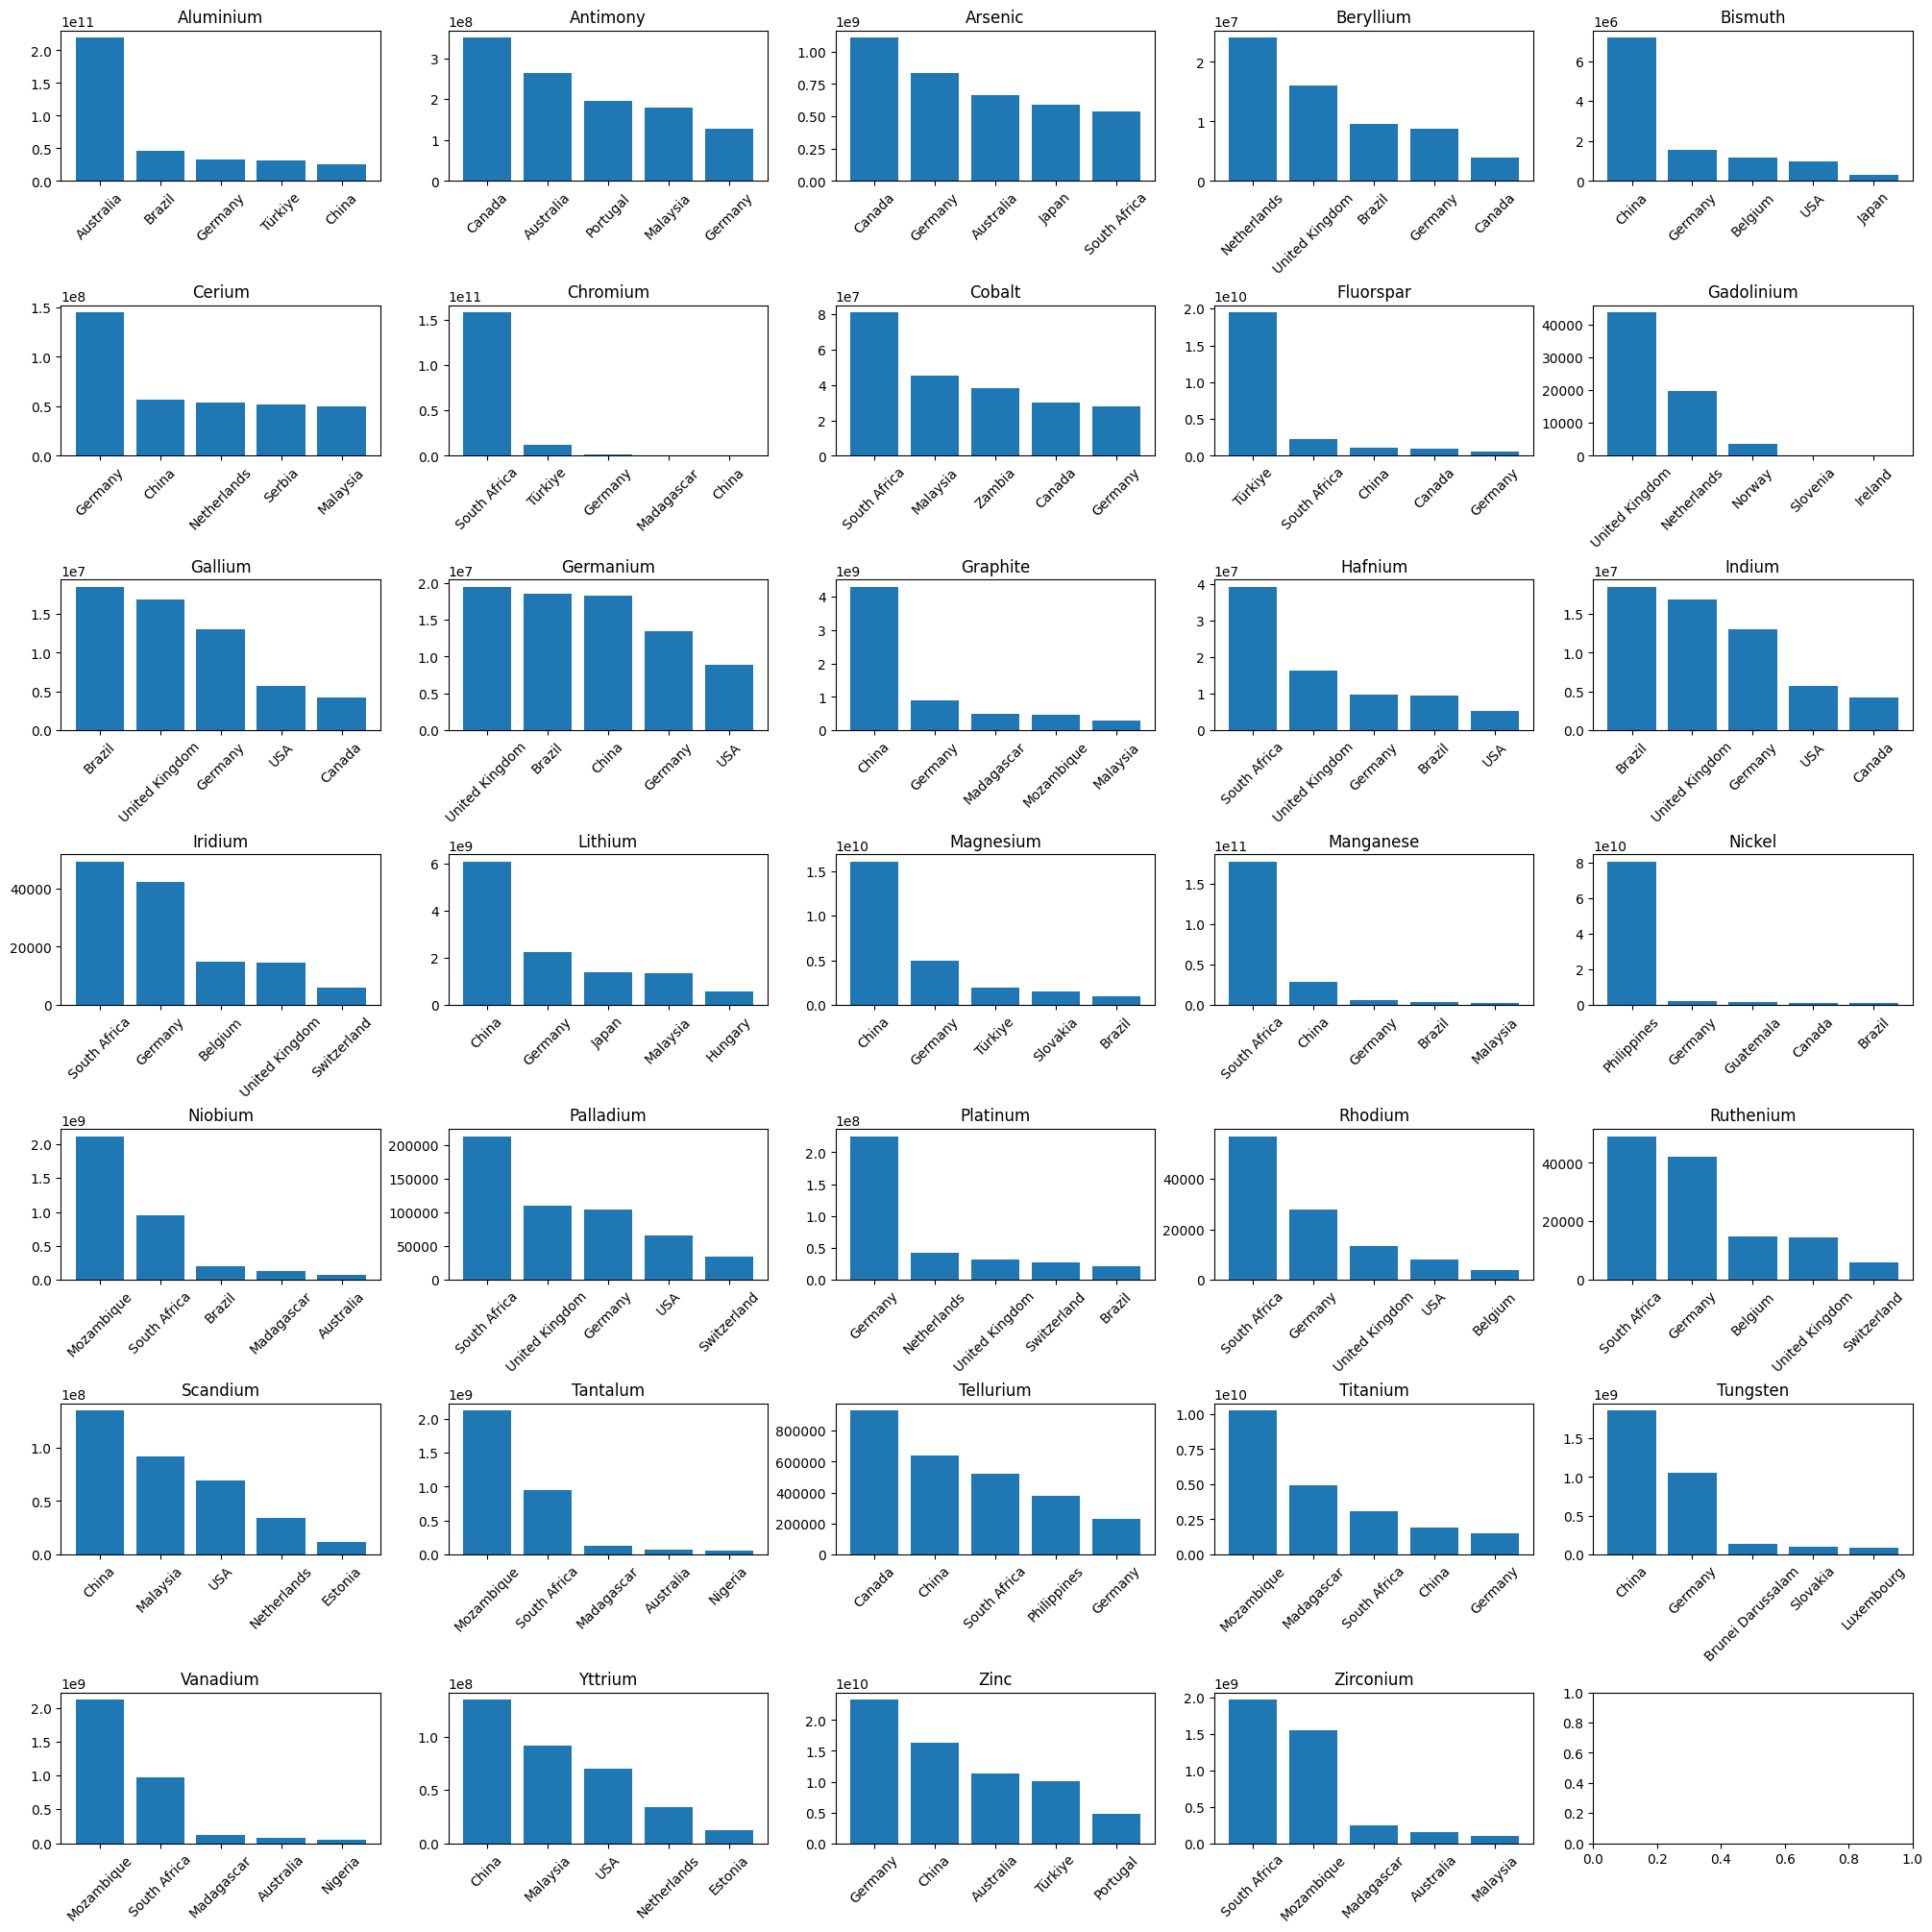

In [9]:
fig, axes = plt.subplots(7, 5, figsize = (20, 20), layout = 'constrained')

for col, ax in zip(trade_df.columns, axes.ravel()):
    top5 = trade_df.sort_values(by = col, ascending = False).head(5)
    ax.bar(top5.index, top5[col])
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=45)

plt.show()

# Country Data

https://www.census.gov/foreign-trade/data/index.html

In [11]:
url = 'https://api.census.gov/data/timeseries/intltrade/exports/hs'
params = {
    'get': 'ALL_VAL_YR,CTY_CODE,CTY_NAME',
    'YEAR': '2023',
    'MONTH': '12'
}
response = requests.get(url, params=params)
data = response.json()
census_df = pd.DataFrame(data[1:], columns = data[0])
census_df.head()

,ALL_VAL_YR,CTY_CODE,CTY_NAME,YEAR,MONTH
0,2019159665204,-,TOTAL FOR ALL COUNTRIES,2023,12
1,368755613397,0003,EUROPEAN UNION,2023,12
2,476306245354,0014,PACIFIC RIM COUNTRIES,2023,12
3,45379318929,0017,CAFTA-DR,2023,12
4,676070718257,0020,NAFTA,2023,12


In [ ]:
census_df.ALL_VAL_YR

In [12]:
# Standardizing country names by removing punctuation and converting to lowercase for better matching
census_df['CTY_NAME_CLEAN'] = census_df['CTY_NAME'].str.replace('[^\w\s]', '', regex=True).str.lower()
reporter_df['text_CLEAN'] = reporter_df['text'].str.replace('[^\w\s]', '', regex=True).str.lower()

# Merging the datasets based on the cleaned country names
country_mapping = pd.merge(census_df, reporter_df, left_on='CTY_NAME_CLEAN', right_on='text_CLEAN', how='left')

# Drop unnecessary columns and rename the relevant ones for clarity
country_mapping = country_mapping[['CTY_NAME', 'CTY_CODE', 'text', 'reporterCode']]
country_mapping.rename(columns={
    'CTY_NAME': 'Census Country', 
    'CTY_CODE': 'Census Code', 
    'text': 'Comtrade Country', 
    'reporterCode': 'Comtrade Code'
}, inplace=True)

country_mapping.dropna(how='any')

,Census Country,Census Code,Comtrade Country,Comtrade Code
1,EUROPEAN UNION,0003,European Union,97.0
11,ASEAN,0027,ASEAN,975.0
13,GREENLAND,1010,Greenland,304.0
14,CANADA,1220,Canada,124.0
17,MEXICO,2010,Mexico,484.0
...,...,...,...,...
247,ZAMBIA,7940,Zambia,894.0
248,ESWATINI,7950,Eswatini,748.0
249,ZIMBABWE,7960,Zimbabwe,716.0
250,MALAWI,7970,Malawi,454.0


In [66]:
unmatched = [cty for cty in reporter_df['text'] if cty not in country_mapping['Comtrade Country'].tolist()]

matches = {}
for comtrade_cty in unmatched:
    census_match = process.extract(comtrade_cty, census_df['CTY_NAME'].tolist(), limit=1, scorer=fuzz.ratio)
    if census_match[0][1] > 70:
        matches.update({comtrade_cty: census_match[0][0]})

matches

{'Bosnia Herzegovina': 'BOSNIA AND HERZEGOVINA',
 'Br. Virgin Isds': 'BRITISH VIRGIN ISLANDS',
 'Cayman Isds': 'CAYMAN ISLANDS',
 'Central African Rep.': 'CENTRAL AFRICAN REPUBLIC',
 'Cook Isds': 'COOK ISLANDS',
 "Côte d'Ivoire": "COTE D'IVOIRE",
 'Curaçao': 'CURACAO',
 'Dominican Rep.': 'DOMINICAN REPUBLIC',
 'Faeroe Isds': 'FAROE ISLANDS',
 'FS Micronesia': 'MICRONESIA',
 'Marshall Isds': 'MARSHALL ISLANDS',
 'North Macedonia': 'MACEDONIA',
 'Saint Helena': 'ST HELENA',
 'Saint Kitts and Nevis': 'ST KITTS AND NEVIS',
 'Saint Lucia': 'ST LUCIA',
 'Saint Maarten': 'SINT MAARTEN',
 'Saint Pierre and Miquelon': 'ST PIERRE AND MIQUELON',
 'Saint Vincent and the Grenadines': 'ST VINCENT AND THE GRENADINES',
 'Solomon Isds': 'SOLOMON ISLANDS',
 'Turks and Caicos Isds': 'TURKS AND CAICOS ISLANDS',
 'Viet Nam': 'VIETNAM',
 'Wallis and Futuna Isds': 'WALLIS AND FUTUNA'}

In [111]:
for comtrade_cty, census_cty in matches.items():
    census_code = census_df.loc[census_df.CTY_NAME == census_cty, 'CTY_CODE'].values[0]
    comtrade_code = reporter_df.loc[reporter_df.text == comtrade_cty, 'reporterCode'].values[0]
    row = {
        'Census Country': census_cty, 
        'Census Code': census_code, 
        'Comtrade Country': comtrade_cty, 
        'Comtrade Code': comtrade_code
    }
    country_mapping = pd.concat([country_mapping, pd.DataFrame(row, index=[0])], axis=0, ignore_index=True)

In [113]:
country_mapping.dropna(how='any')

,Census Country,Census Code,Comtrade Country,Comtrade Code
1,EUROPEAN UNION,0003,European Union,97.0
11,ASEAN,0027,ASEAN,975.0
13,GREENLAND,1010,Greenland,304.0
14,CANADA,1220,Canada,124.0
17,MEXICO,2010,Mexico,484.0
...,...,...,...,...
270,ST VINCENT AND THE GRENADINES,2488,Saint Vincent and the Grenadines,670.0
271,SOLOMON ISLANDS,6223,Solomon Isds,90.0
272,TURKS AND CAICOS ISLANDS,2430,Turks and Caicos Isds,796.0
273,VIETNAM,5520,Viet Nam,704.0


In [125]:
pd.merge(
    country_mapping, census_df[['CTY_CODE', 'ALL_VAL_YR']], 
    left_on='Census Code', right_on='CTY_CODE', how='left'
).dropna(how='any').drop(['CTY_CODE'], axis=1).sort_values(by='ALL_VAL_YR').dtypes

Census Country       object
Census Code          object
Comtrade Country     object
Comtrade Code       float64
ALL_VAL_YR           object
dtype: object

In [ ]:
url = 'https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States#Countries_with_strained_relations_with_the_United_States'

HTTPError: HTTP Error 403: Forbidden